In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19 
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

<h1>Generative Models</h1>

In [3]:
vgg19 = VGG19()

In [4]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
for layer in vgg19.layers[1:9]:
    print(layer.name)

block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2


In [6]:
for layer in vgg19.layers[:9]:
    layer.trainable = False

In [7]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
(data_train, labels_train), (data_test, labels_test) = load_data()

In [9]:
tf.expand_dims(data_train, -1).shape

TensorShape([60000, 28, 28, 1])

In [10]:
data_train = tf.expand_dims(data_train, -1)
data_test = tf.expand_dims(data_test, -1)

In [11]:
data_train = tf.cast(data_train, tf.float32) / 255.0
data_test = tf.cast(data_test, tf.float32) / 255.0

In [12]:
tf.keras.backend.clear_session()
cnn = None

In [13]:
input_layer = Input(shape = (28, 28, 1))

cnn = Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same")(input_layer)
cnn = MaxPool2D()(cnn)
cnn = Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = "same")(cnn)
cnn = MaxPool2D()(cnn)

representation = Conv2D(filters = 16, kernel_size = (3, 3), activation = "relu", padding = "same", name = "representation")(cnn)

cnn = Conv2D(filters = 16, kernel_size = (3, 3), activation = "relu", padding = "same")(representation)
cnn = UpSampling2D()(cnn)
cnn = Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = "same")(cnn)
cnn = UpSampling2D()(cnn)
cnn = Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same")(cnn)

output_layer = Conv2D(filters = 1, kernel_size = (3, 3), padding = "same")(cnn)

In [14]:
model = Model(inputs = input_layer, outputs = output_layer)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
representation (Conv2D)      (None, 7, 7, 16)          4624      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320  

In [16]:
encoder = Model(inputs = input_layer, outputs = representation)

In [17]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
representation (Conv2D)      (None, 7, 7, 16)          4624      
Total params: 23,728
Trainable params: 23,728
Non-trainable params: 0
_______________________________________________________

In [18]:
model.compile(loss = "mse", optimizer  = "adam")

In [19]:
model.fit(data_train, data_train, epochs  = 1)

1875/1875 [==============================] - 31s 15ms/step - loss: 0.0056


In [20]:
data_train[:10].shape

TensorShape([10, 28, 28, 1])

In [21]:
prediction_train = model.predict(tf.squeeze(data_train[:10]))

In [22]:
prediction_train.shape

(10, 28, 28, 1)

In [23]:
for image in prediction_train:
    print(image.shape)
    break

(28, 28, 1)


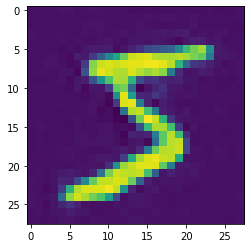

In [24]:
for image in prediction_train:
    plt.imshow(tf.squeeze(image))
    break

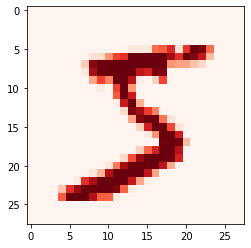

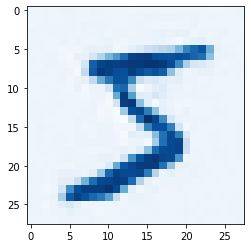

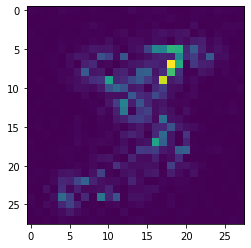

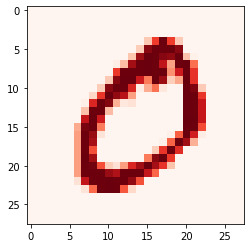

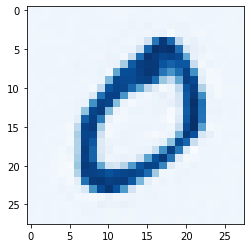

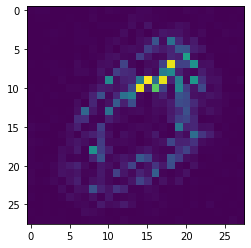

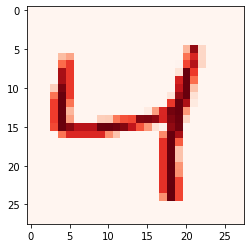

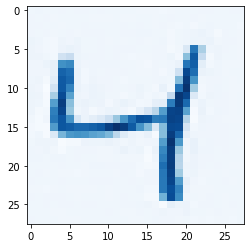

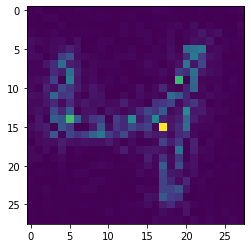

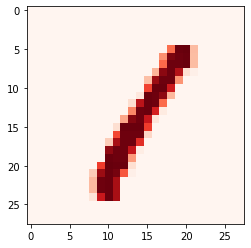

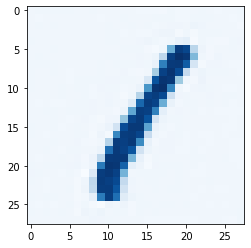

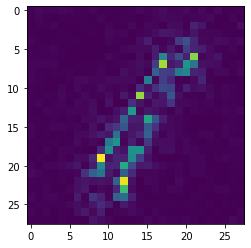

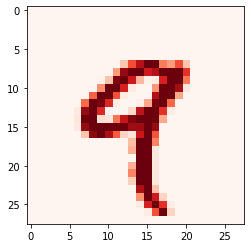

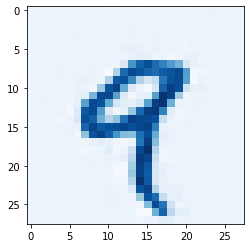

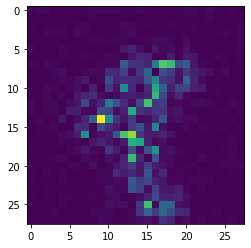

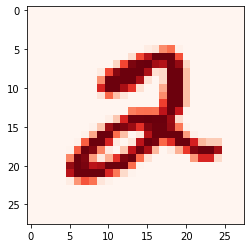

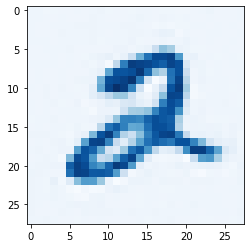

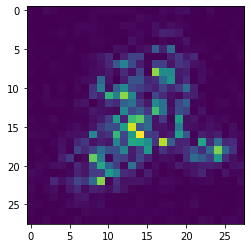

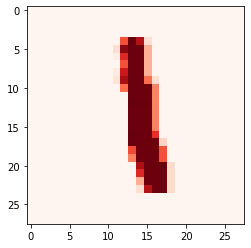

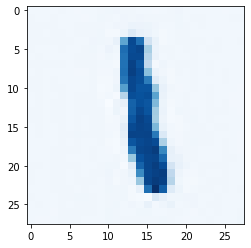

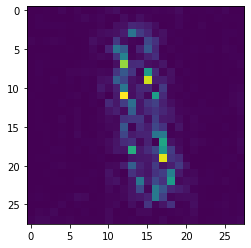

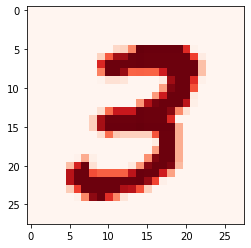

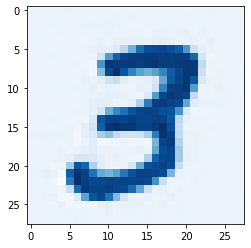

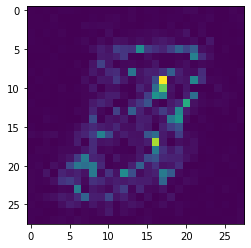

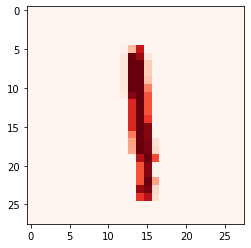

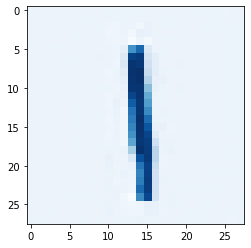

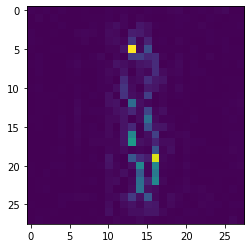

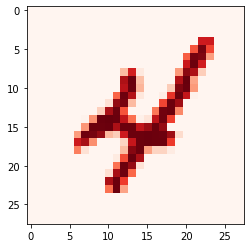

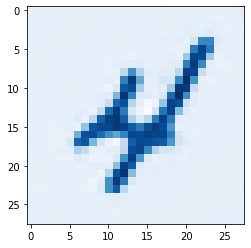

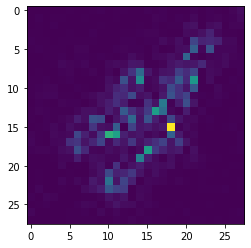

In [25]:
for original, pred in zip(tf.squeeze(data_train[:10]), prediction_train):
    plt.imshow(tf.squeeze(original), cmap = "Reds")
    plt.show()     
    plt.imshow(tf.squeeze(pred), cmap = "Blues")
    plt.show() 
    
    plt.imshow(tf.abs(tf.squeeze(original) - tf.squeeze(pred)))
    plt.show()

In [26]:
tf.abs(tf.squeeze(original) - tf.squeeze(pred))

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[2.55390070e-04, 1.91246253e-03, 1.00717414e-03, 2.22762255e-03,
        2.11997190e-03, 4.22871253e-03, 6.43110834e-05, 1.39769679e-03,
        3.94684309e-03, 5.50982589e-03, 1.35841733e-03, 2.90089613e-03,
        3.05897230e-03, 1.85278710e-04, 1.16863614e-03, 5.68998093e-03,
        3.25968629e-03, 4.67088586e-03, 2.61875335e-04, 8.36224761e-04,
        1.45482365e-04, 6.90980488e-03, 1.22082746e-03, 5.36894426e-03,
        3.08342045e-03, 1.28901098e-04, 9.22558270e-03, 1.97292212e-02],
       [1.57804159e-03, 4.74809436e-03, 1.56472437e-04, 3.50453937e-03,
        2.70419056e-03, 1.54077495e-03, 1.90427667e-03, 2.51418119e-03,
        4.60895244e-04, 9.63979866e-04, 2.15794099e-03, 3.13186040e-03,
        7.35563692e-04, 6.09425362e-04, 2.65268143e-04, 1.32984156e-03,
        7.29858642e-03, 5.45659428e-03, 7.53554050e-04, 4.70512593e-03,
        2.43118638e-03, 1.22048426e-02, 9.34544019e-04, 4.81169531e-03,
        8.636